In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

SEED = 42
np.random.seed(SEED)

In [52]:
# identify digital numbers from scanned images

# try logistic regression
# try svm

In [53]:
df_data = datasets.load_digits()
class_names = df_data.target_names
df = pd.DataFrame(df_data.data, columns=df_data.feature_names)  # Inputs/Indep variables
df['class'] = df_data.target

In [54]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
pixel_7_7,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


Step 2: EDA & Data Preprocessing
- What values do you see?
- What distributions do you see?
- What relationships do you see?
- What relationships do you think might benefit the prediction problem?
- What ideas about the domain does the data spark?

In [57]:
df.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'class'],
      dtype='object')

In [58]:
# Look for cells with missing data (i.e. Null or NA)
df.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
class        0
Length: 65, dtype: int64

In [59]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df.corr()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


In [60]:
df.fillna(0) 

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [61]:
# As this is a classification exercise, we will check whether the target (dependent variable) is imbalanced
df['class'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: class, dtype: int64

In [62]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

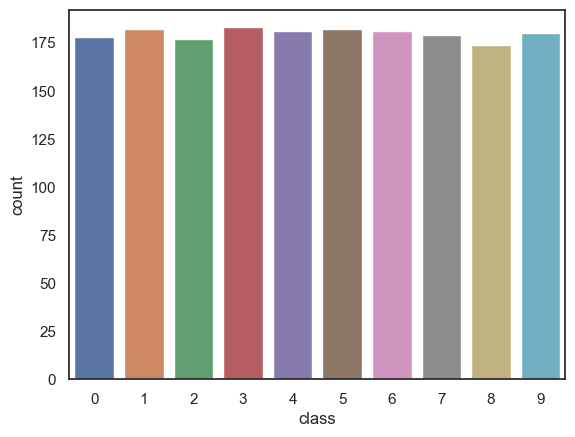

In [63]:
# To visualize how well balanced the target (dependent variable) is
sns.countplot(x=df['class'])

In [64]:
# correlation matrix heatmap visualization
#sns.set(style="white")

# Generate a mask for the upper triangle
#matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
#fig, ax = plt.subplots(figsize=(30,24))

# Plot the heatmap
#sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 24}, square=True, 
             #   cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

In [66]:
# Visualize correlations drilled down by dependent variable
#sns.pairplot(df, corner=True, hue='class')

Step 3: Preparing the data for training and testing
- Divide our independent and dependent variable into two separate variables.

- Split the data into training and testing datasets.

In [40]:
# 1)

X = df.drop(['class'], axis=1) # input
y = df['class'] # output (dependent variable)

In [41]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)

Step 4: Training the model

In [42]:
# Import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=5000)

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

Step 5: Testing the model

In [43]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [44]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
618,5,5
1427,2,2
158,8,8
1256,1,8
1079,7,7
648,2,2
1773,6,6
1531,2,2
1063,6,6
781,5,5


Step 6: Evaluate the model

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

# Classification Report
#print("Classification report:")
#print()
#print(classification_report(y_test, y_pred, target_names=class_names.tolist()))
#print()

# Confusion Matrix
#print("Confusion Matrix:")
#confusion_matrix(y_test, y_pred)

In [46]:
# Accuracy Score
test_acc = classifier.score(X_test, y_test)
print("Accuracy  = {:.2f}".format(test_acc))

# Precision
test_pre = precision_score(y_test, y_pred, average=None)
print("Precision = {}".format(test_pre))

# Recall
test_rec  = recall_score(y_test, y_pred, average=None)
print("Recall    = {}".format(test_rec))

Accuracy  = 0.96
Precision = [1.         0.91176471 1.         0.94871795 0.97297297 0.97297297
 1.         0.97222222 0.86111111 0.97142857]
Recall    = [1.         0.86111111 1.         1.         1.         0.97297297
 0.97222222 0.97222222 0.88571429 0.94444444]


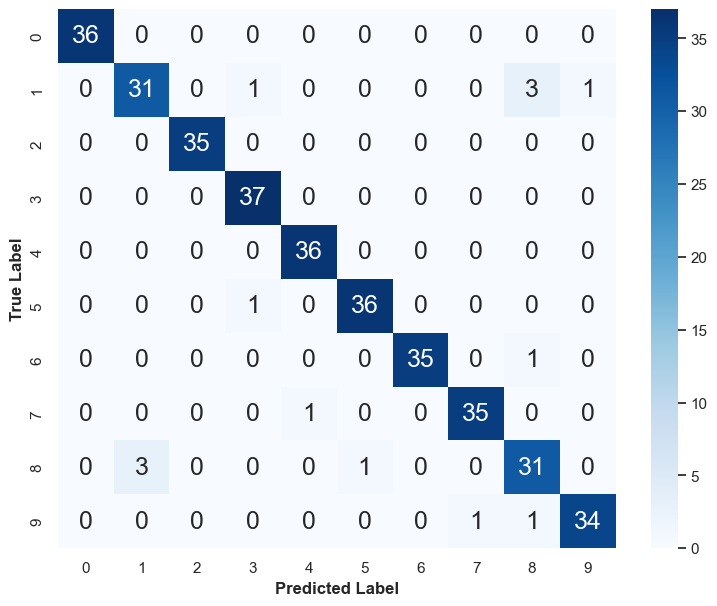

In [47]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [48]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:20]

,Desired Output (Actuals),Predicted Output
1256,1,8
751,9,7
492,6,8
1553,8,1
1288,1,9
363,1,8
69,9,8
639,8,1
129,8,1
191,7,4


Step 7: My own prediction using one of the observations from X_test

In [49]:
# Choose a random row from X_test
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = classifier.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is a {}.".format(class_names[own_pred[0]]))
print("This was the input data:")
print(my_features)

My prediction is a 3.
This was the input data:
pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     6.0
pixel_0_3    13.0
pixel_0_4    16.0
             ... 
pixel_7_3    16.0
pixel_7_4    14.0
pixel_7_5     6.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 669, Length: 64, dtype: float64


C:\Users\JKM\anaconda3\envs\JensWorlds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
